In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "veneto"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2020-11-26T17:00:00,5,Veneto,2447,304,2751,72401,75152,14,3980,...,72.0,19146.0,5885.0,-10.0,11.05,3.66,20.79,67.63,-0.33,0.02
276,2020-11-27T17:00:00,5,Veneto,2440,303,2743,74145,76888,1736,3418,...,60.0,16870.0,4976.0,1744.0,11.05,3.57,20.26,68.69,-0.33,2.31
277,2020-11-28T17:00:00,5,Veneto,2654,309,2963,75609,78572,1684,3498,...,83.0,18307.0,5302.0,1464.0,10.43,3.77,19.11,65.98,1.98,2.19
278,2020-11-29T17:00:00,5,Veneto,2442,311,2753,76958,79711,1139,2617,...,33.0,13241.0,3894.0,1349.0,11.30,3.45,19.76,67.21,0.65,1.45


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 30, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2003
Nuovi tamponi: 8985.0
Percentuale nuovi positivi/nuovi tamponi: 22.3 %
Nuovi guariti: 1015.0
Nuovi deceduti: 34.0
Variazione positivi ricoverati con sintomi: 18.0
Variazione positivi in terapia intensiva: 9.0
Variazione positivi in isolamento dimiciliare: 927.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 30, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-01T17:00:00,5,Veneto,180,24,204,3761,3965,233,445,...,5.0,18274.0,6269.0,223.0,11.76,5.15,2.44,7.10,14.29,6.24
1,2020-10-02T17:00:00,5,Veneto,167,22,189,3838,4027,62,191,...,6.0,18637.0,8810.0,77.0,11.64,4.69,1.02,2.17,-8.33,1.56
2,2020-10-03T17:00:00,5,Veneto,174,21,195,3917,4112,85,276,...,4.0,19891.0,8165.0,79.0,10.77,4.74,1.39,3.38,-4.55,2.11
3,2020-10-04T17:00:00,5,Veneto,178,20,198,4037,4235,123,261,...,1.0,12817.0,5416.0,120.0,10.10,4.68,2.04,4.82,-4.76,2.99
4,2020-10-05T17:00:00,5,Veneto,182,20,202,4199,4401,166,230,...,0.0,6986.0,2468.0,162.0,9.90,4.59,3.29,9.32,0.00,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-26T17:00:00,5,Veneto,2447,304,2751,72401,75152,14,3980,...,72.0,19146.0,5885.0,-10.0,11.05,3.66,20.79,67.63,-0.33,0.02
57,2020-11-27T17:00:00,5,Veneto,2440,303,2743,74145,76888,1736,3418,...,60.0,16870.0,4976.0,1744.0,11.05,3.57,20.26,68.69,-0.33,2.31
58,2020-11-28T17:00:00,5,Veneto,2654,309,2963,75609,78572,1684,3498,...,83.0,18307.0,5302.0,1464.0,10.43,3.77,19.11,65.98,1.98,2.19
59,2020-11-29T17:00:00,5,Veneto,2442,311,2753,76958,79711,1139,2617,...,33.0,13241.0,3894.0,1349.0,11.30,3.45,19.76,67.21,0.65,1.45


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

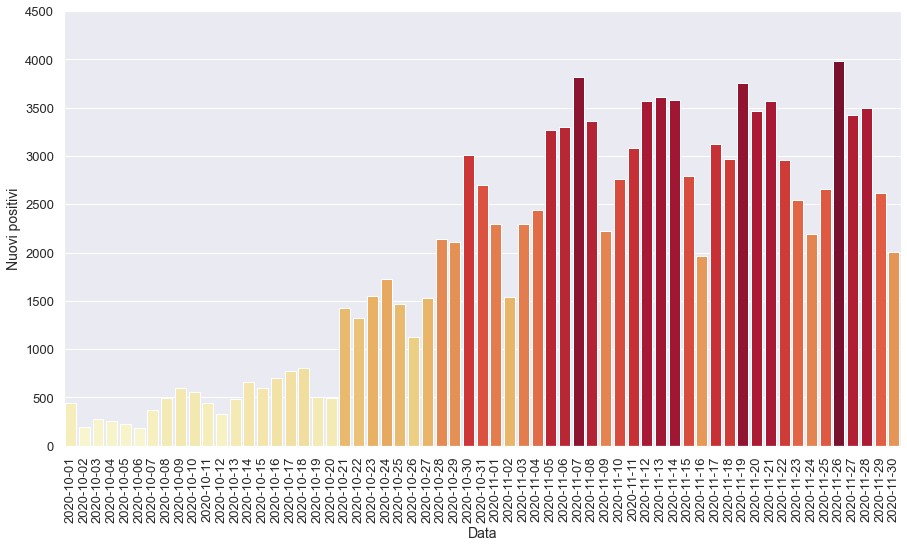

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

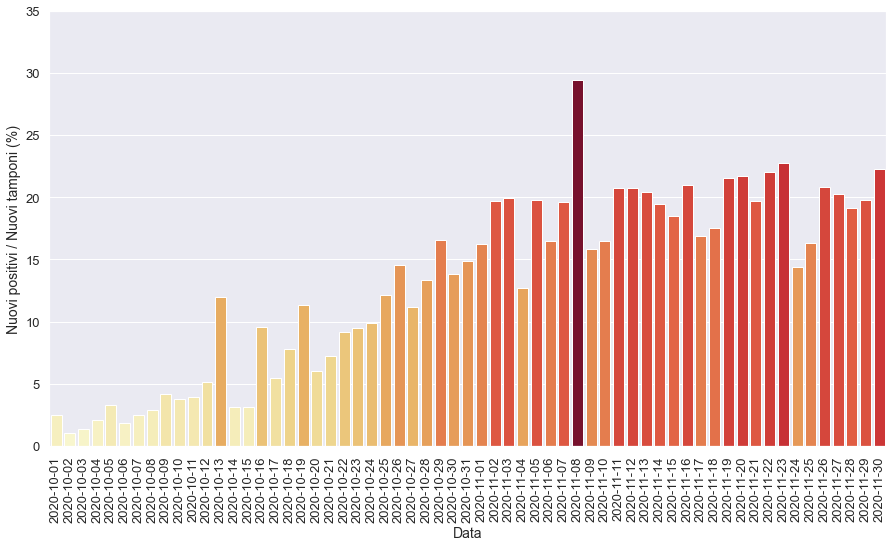

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

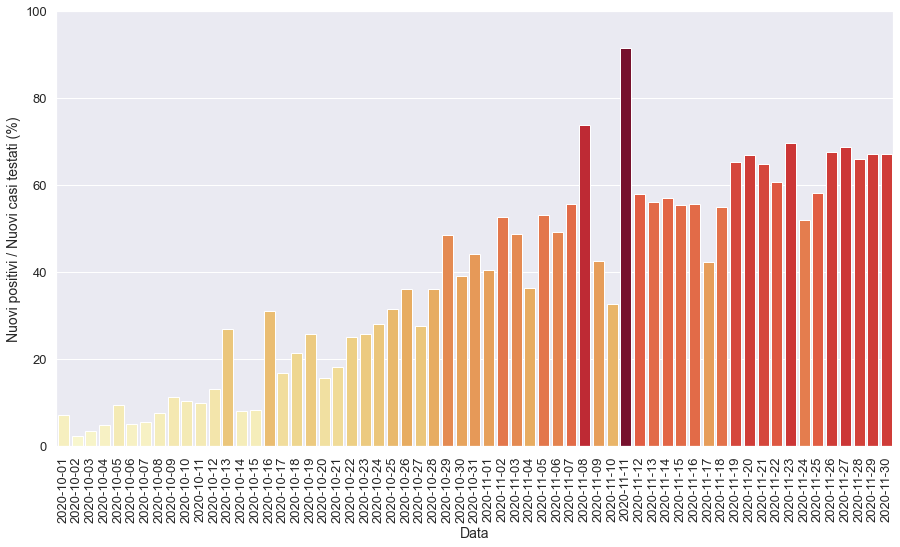

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

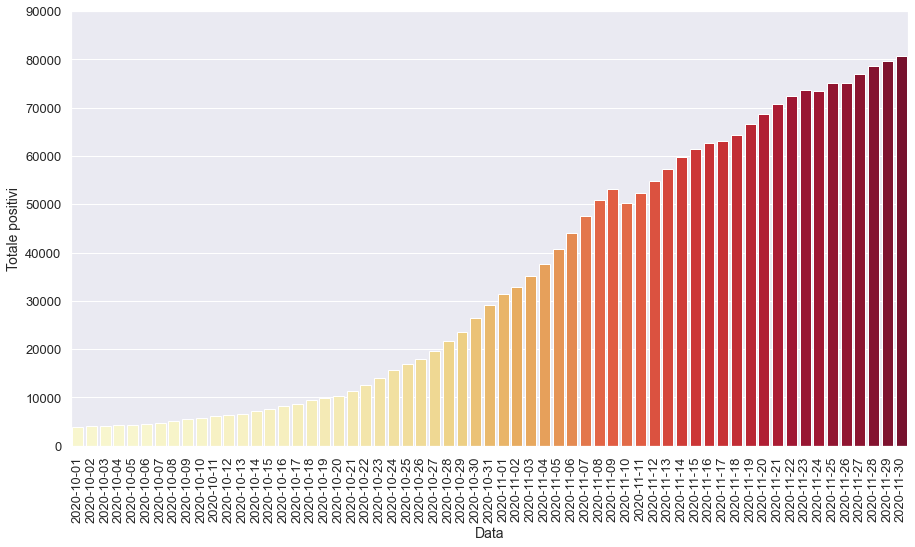

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

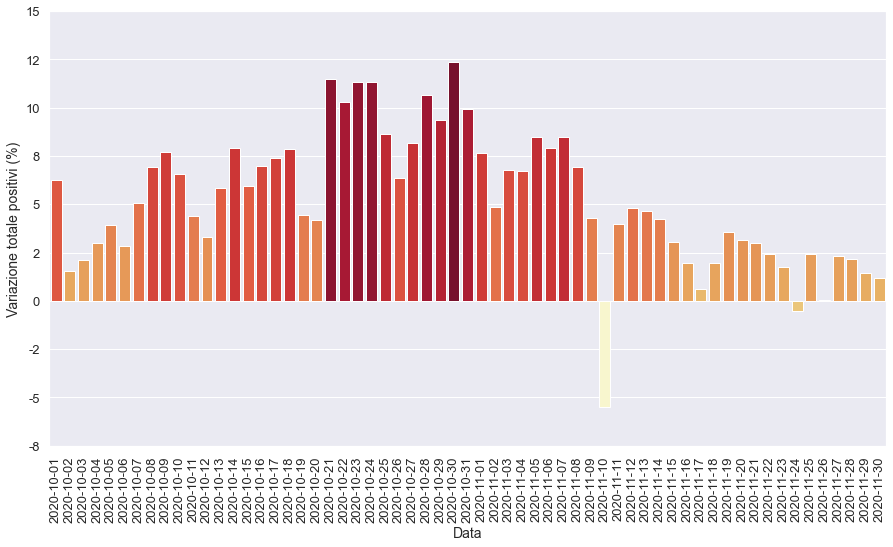

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

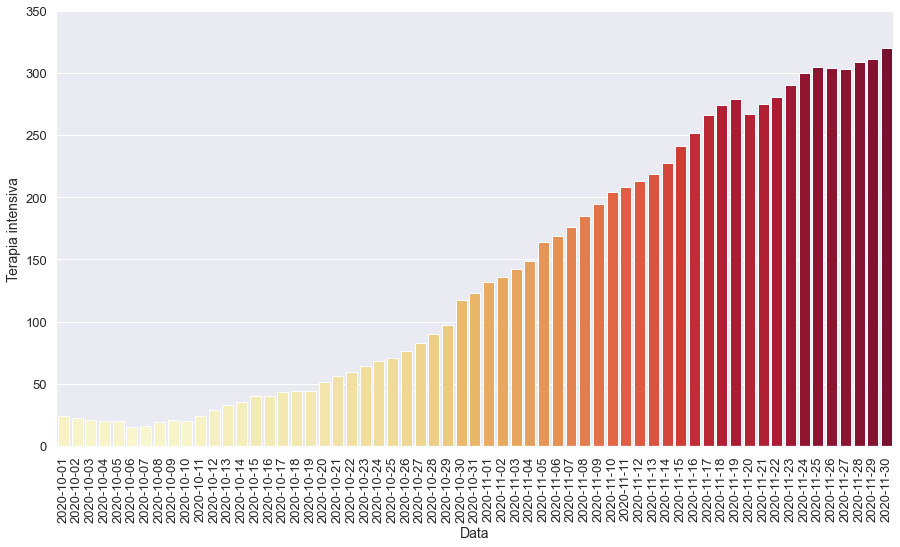

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

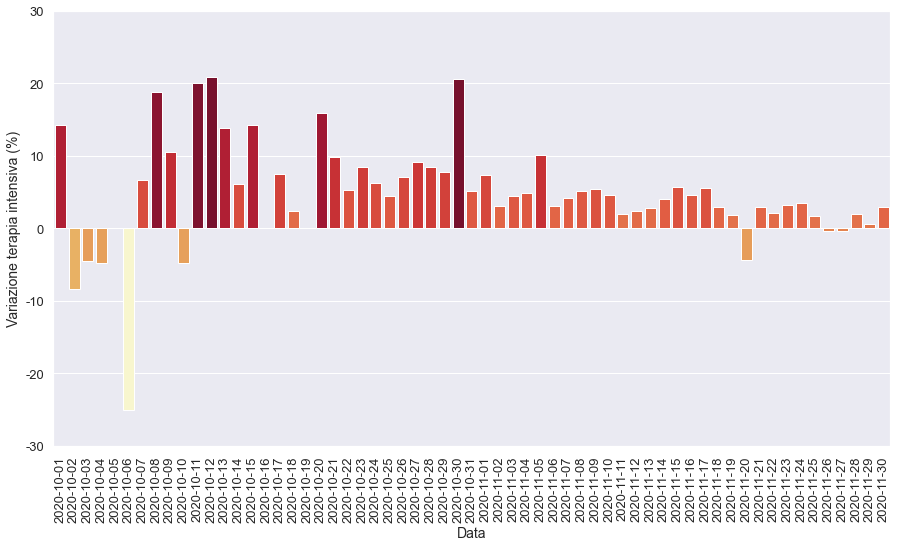

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

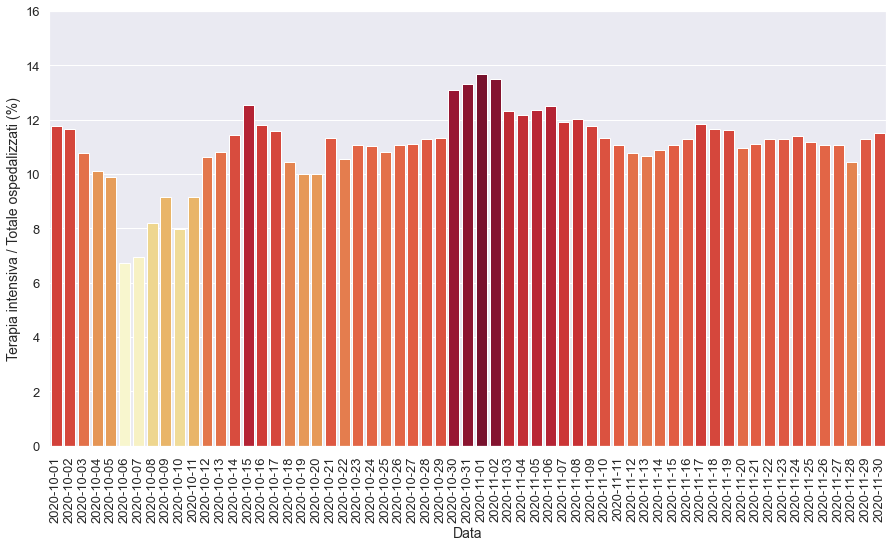

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

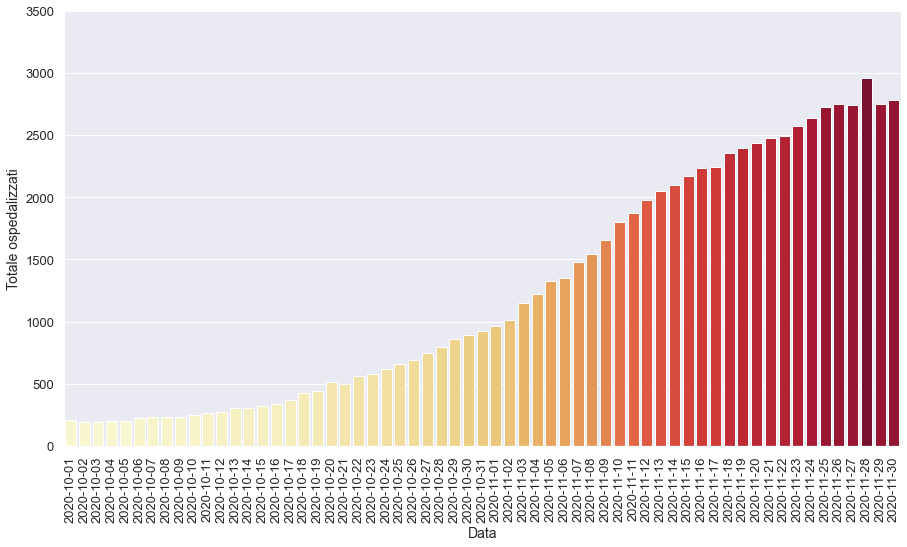

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

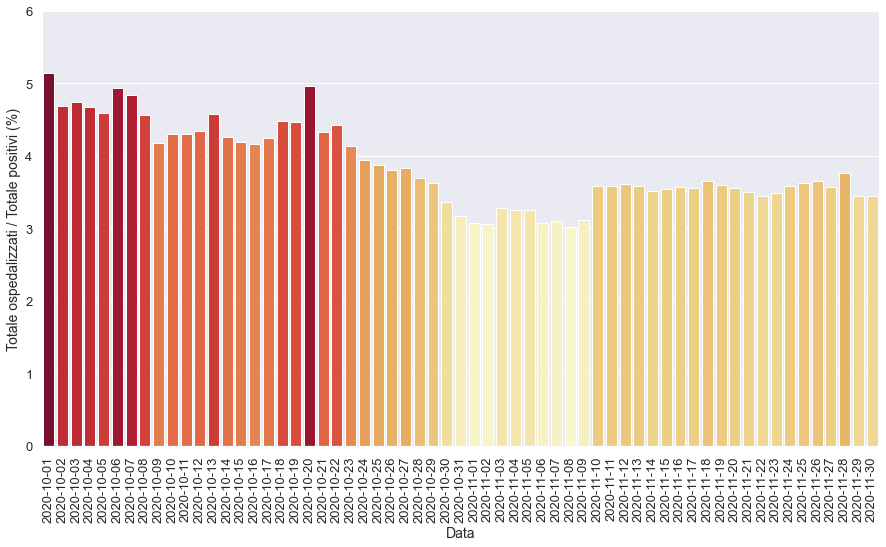

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

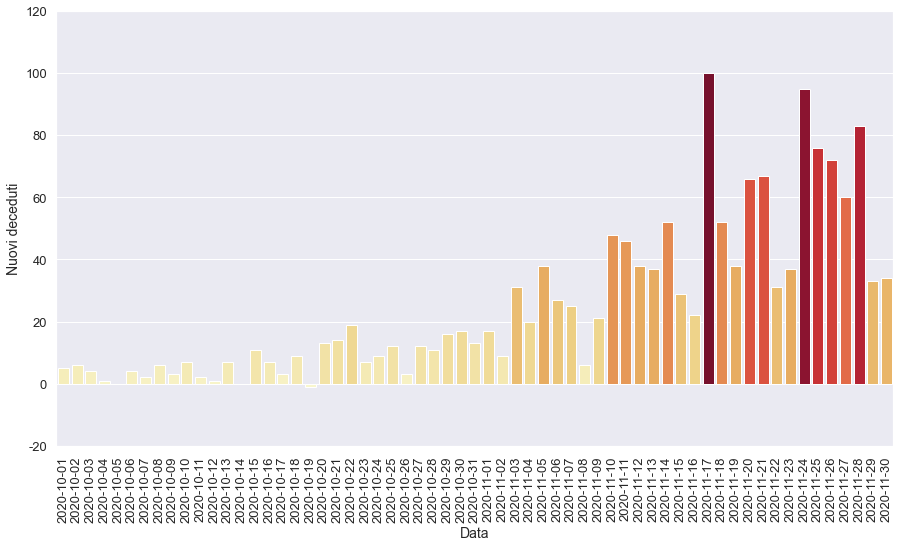

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

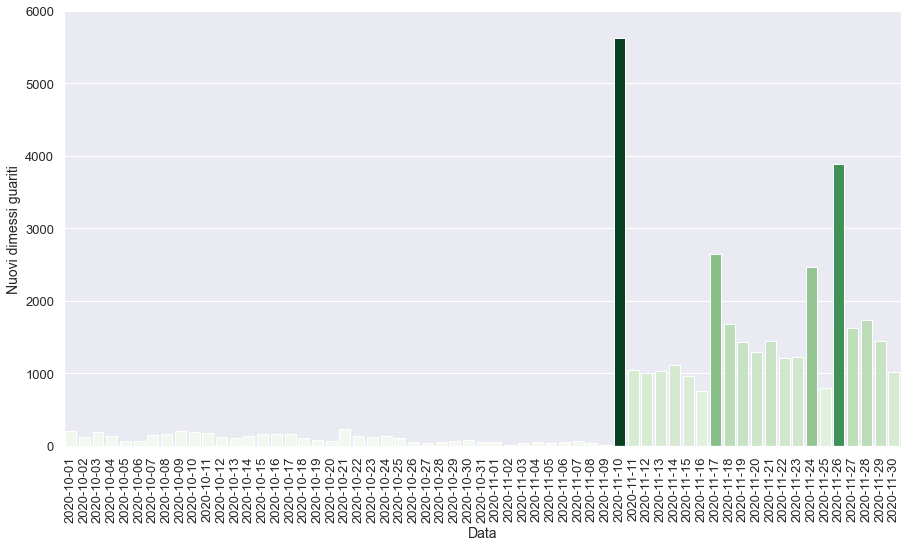

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-31T17:00:00,5,Veneto,801,123,924,28255,29179,2632,2697,...,13.0,18117.0,6100.0,2602.0,13.31,3.17,14.89,44.21,5.13,9.91
1,2020-11-01T17:00:00,5,Veneto,832,132,964,30450,31414,2235,2300,...,17.0,14172.0,5703.0,2195.0,13.69,3.07,16.23,40.33,7.32,7.66
2,2020-11-02T17:00:00,5,Veneto,873,136,1009,31924,32933,1519,1544,...,9.0,7831.0,2932.0,1474.0,13.48,3.06,19.72,52.66,3.03,4.84
3,2020-11-03T17:00:00,5,Veneto,1011,142,1153,34013,35166,2233,2298,...,31.0,11522.0,4712.0,2089.0,12.32,3.28,19.94,48.77,4.41,6.78
4,2020-11-04T17:00:00,5,Veneto,1076,149,1225,36311,37536,2370,2436,...,20.0,19131.0,6731.0,2298.0,12.16,3.26,12.73,36.19,4.93,6.74
5,2020-11-05T17:00:00,5,Veneto,1162,164,1326,39393,40719,3183,3264,...,38.0,16485.0,6161.0,3082.0,12.37,3.26,19.80,52.98,10.07,8.48
6,2020-11-06T17:00:00,5,Veneto,1184,169,1353,42584,43937,3218,3297,...,27.0,20005.0,6704.0,3191.0,12.49,3.08,16.48,49.18,3.05,7.90
7,2020-11-07T17:00:00,5,Veneto,1300,176,1476,46181,47657,3720,3815,...,25.0,19420.0,6863.0,3597.0,11.92,3.10,19.64,55.59,4.14,8.47
8,2020-11-08T17:00:00,5,Veneto,1355,185,1540,49430,50970,3313,3362,...,6.0,11423.0,4558.0,3249.0,12.01,3.02,29.43,73.76,5.11,6.95
9,2020-11-09T17:00:00,5,Veneto,1464,195,1659,51503,53162,2192,2223,...,21.0,14026.0,5235.0,2073.0,11.75,3.12,15.85,42.46,5.41,4.30


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

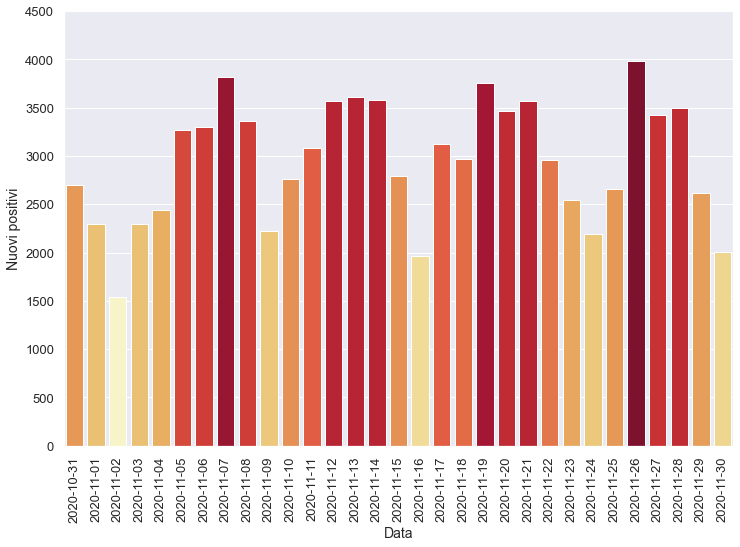

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

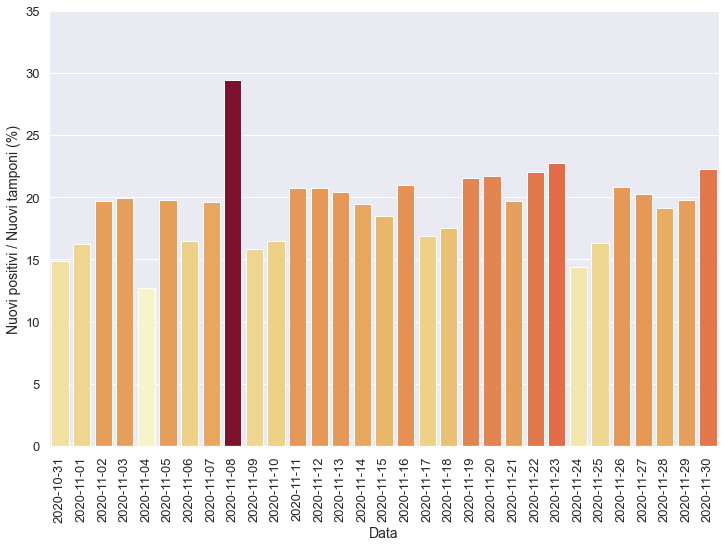

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

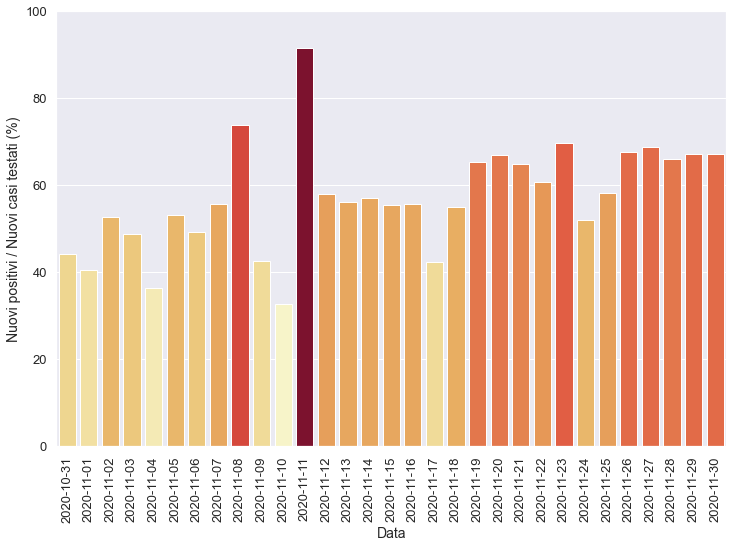

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

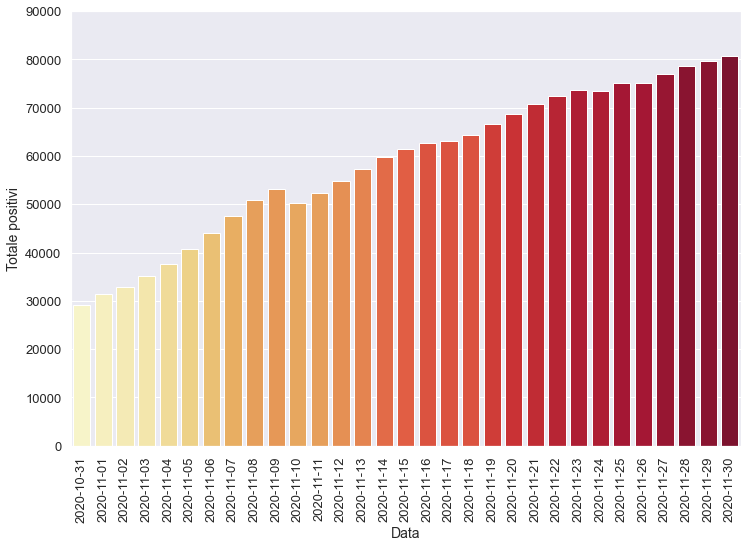

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

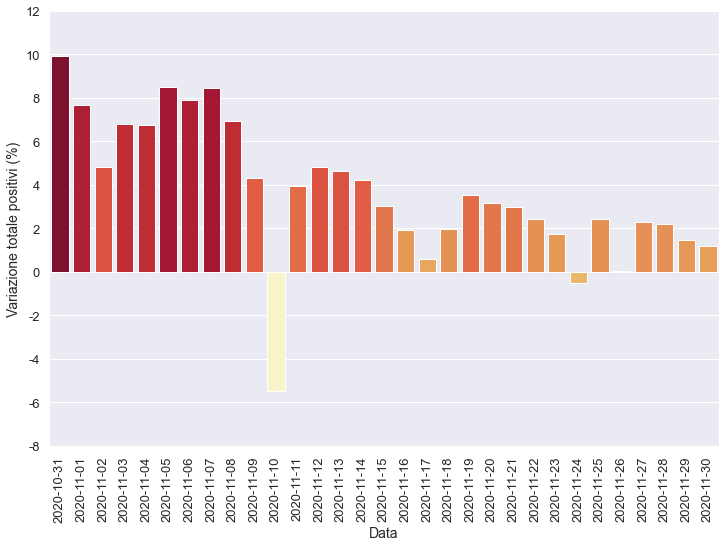

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

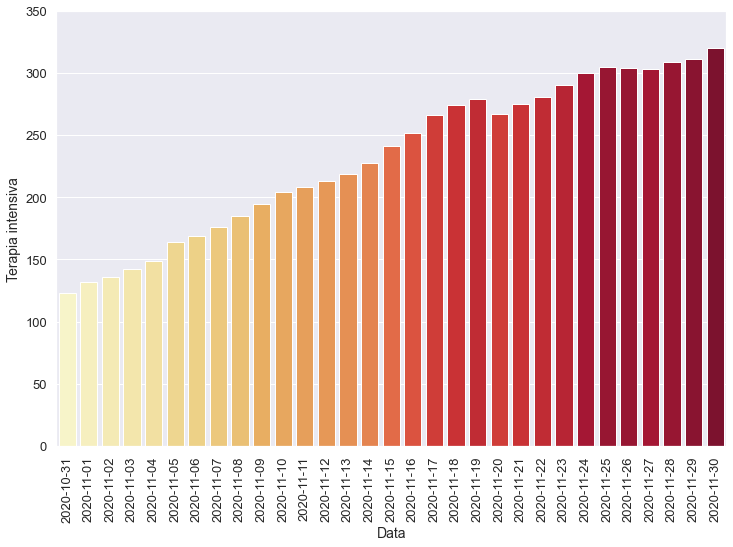

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

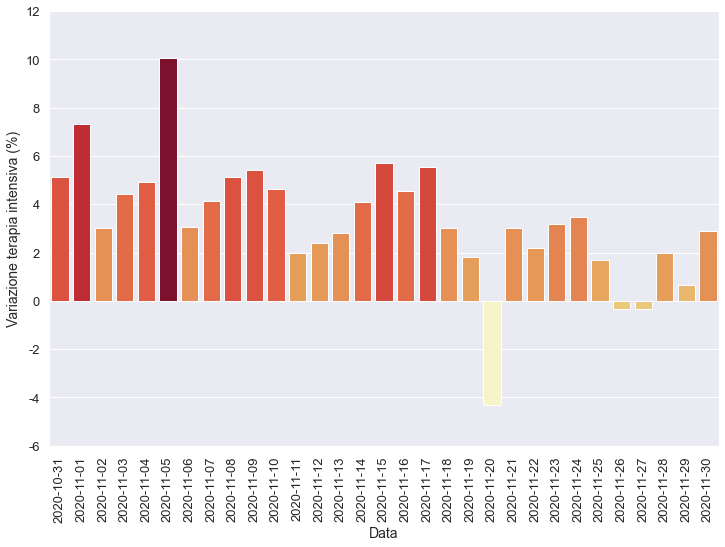

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

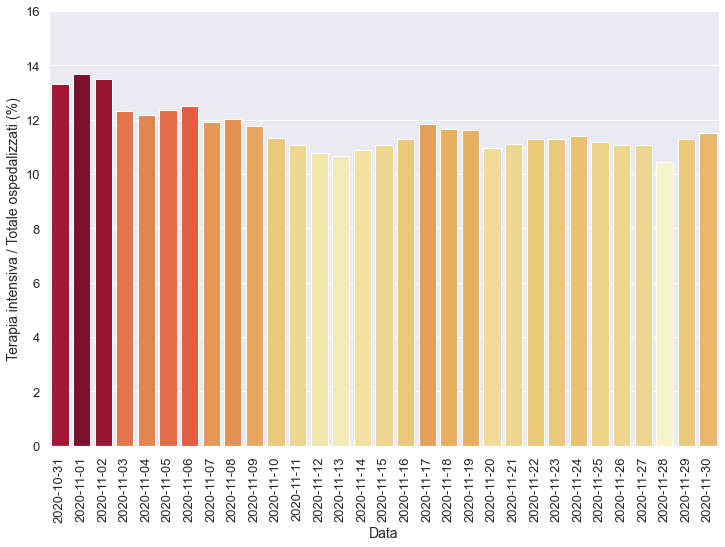

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

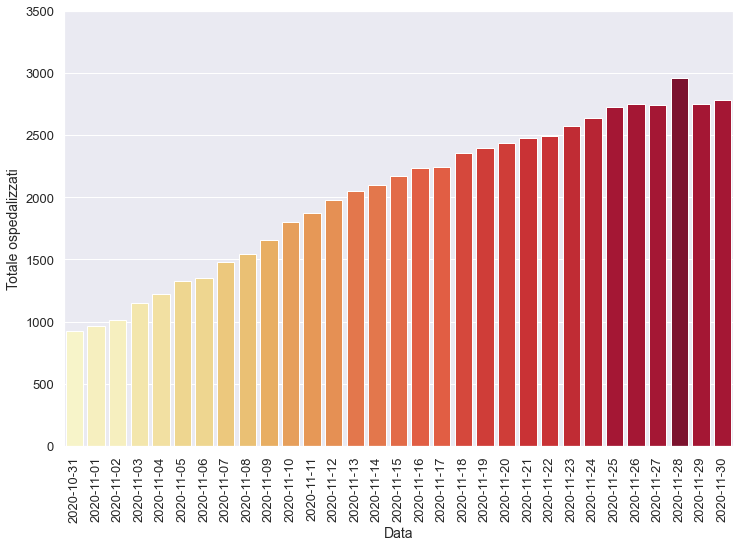

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

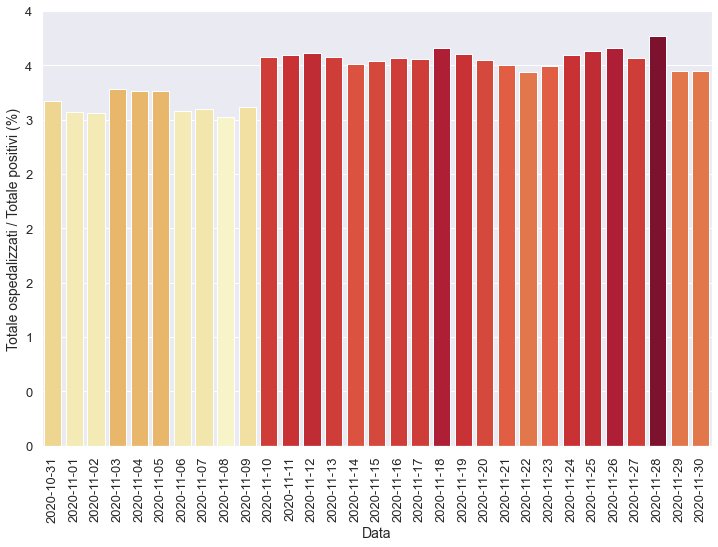

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

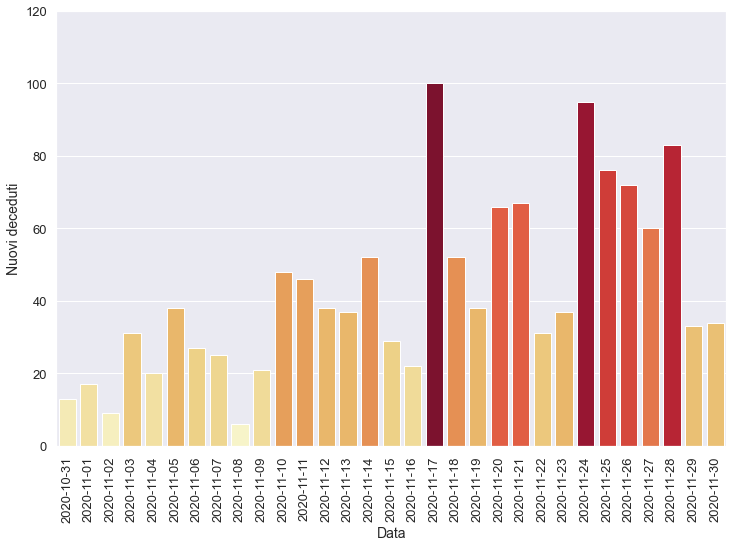

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

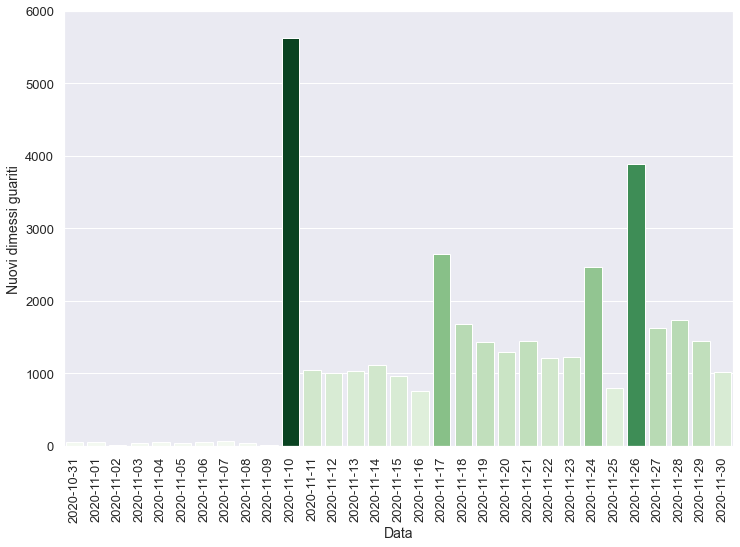

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-23T17:00:00,5,Veneto,2280,290,2570,71157,73727,1271,2540,...,37.0,11148.0,3653.0,1193.0,11.28,3.49,22.78,69.53,3.20,1.75
1,2020-11-24T17:00:00,5,Veneto,2336,300,2636,70718,73354,-373,2194,...,95.0,15205.0,4224.0,-439.0,11.38,3.59,14.43,51.94,3.45,-0.51
2,2020-11-25T17:00:00,5,Veneto,2422,305,2727,72411,75138,1784,2660,...,76.0,16297.0,4572.0,1693.0,11.18,3.63,16.32,58.18,1.67,2.43
3,2020-11-26T17:00:00,5,Veneto,2447,304,2751,72401,75152,14,3980,...,72.0,19146.0,5885.0,-10.0,11.05,3.66,20.79,67.63,-0.33,0.02
4,2020-11-27T17:00:00,5,Veneto,2440,303,2743,74145,76888,1736,3418,...,60.0,16870.0,4976.0,1744.0,11.05,3.57,20.26,68.69,-0.33,2.31
5,2020-11-28T17:00:00,5,Veneto,2654,309,2963,75609,78572,1684,3498,...,83.0,18307.0,5302.0,1464.0,10.43,3.77,19.11,65.98,1.98,2.19
6,2020-11-29T17:00:00,5,Veneto,2442,311,2753,76958,79711,1139,2617,...,33.0,13241.0,3894.0,1349.0,11.30,3.45,19.76,67.21,0.65,1.45
7,2020-11-30T17:00:00,5,Veneto,2460,320,2780,77885,80665,954,2003,...,34.0,8985.0,2983.0,927.0,11.51,3.45,22.29,67.15,2.89,1.20


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

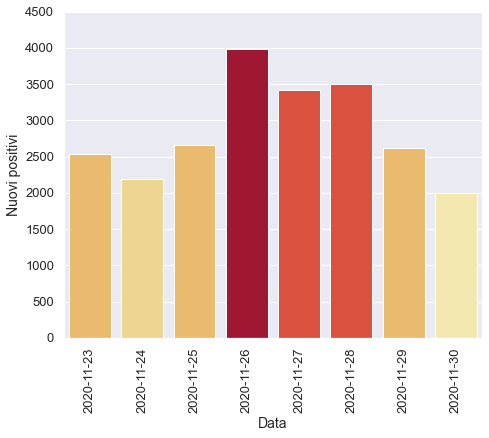

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

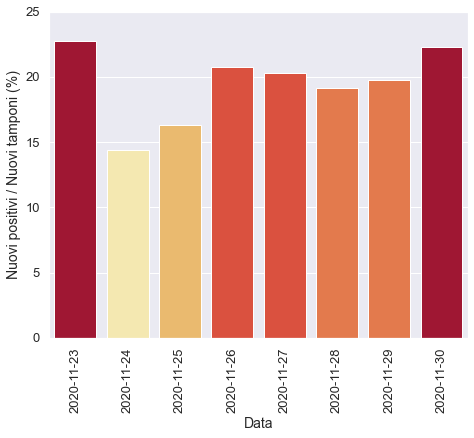

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

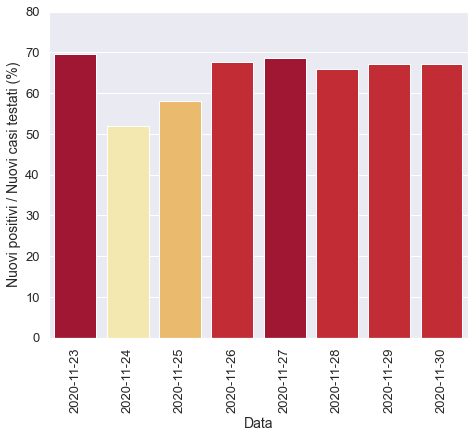

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

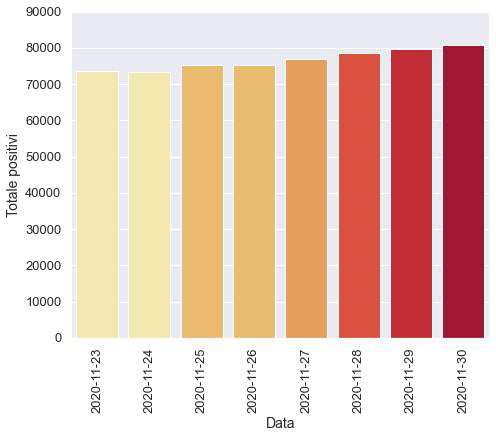

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

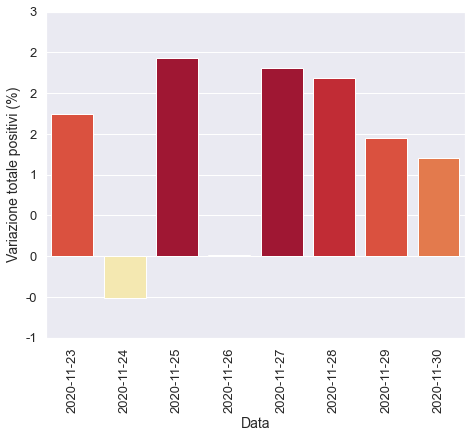

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

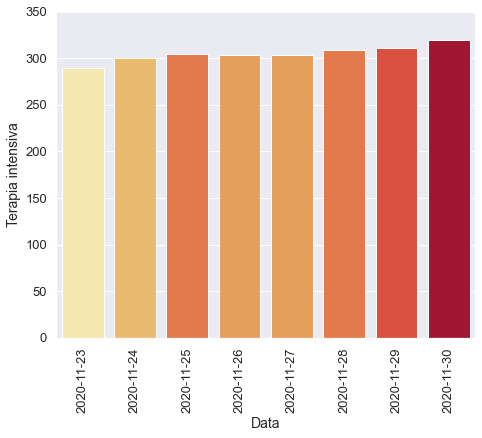

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

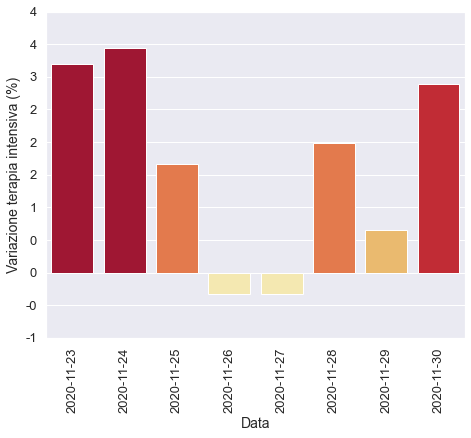

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

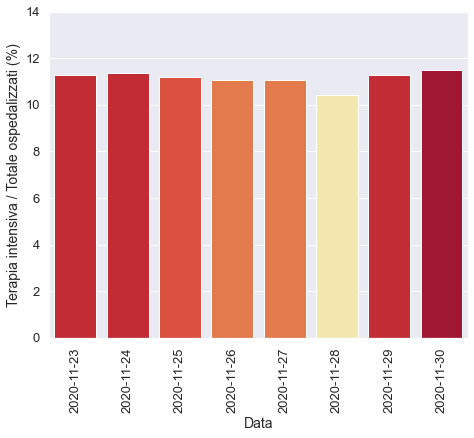

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

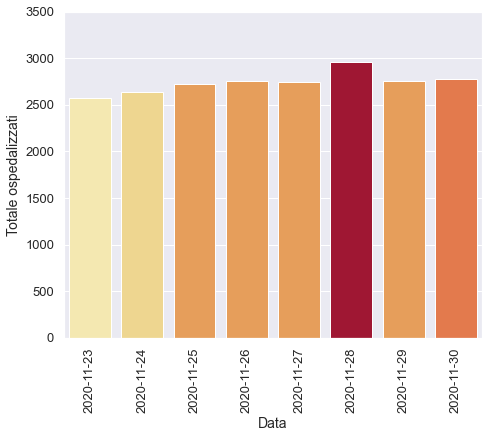

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

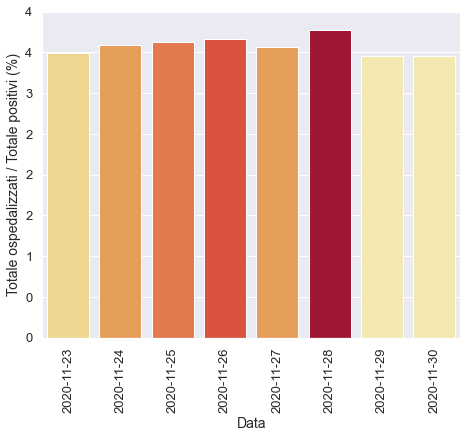

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

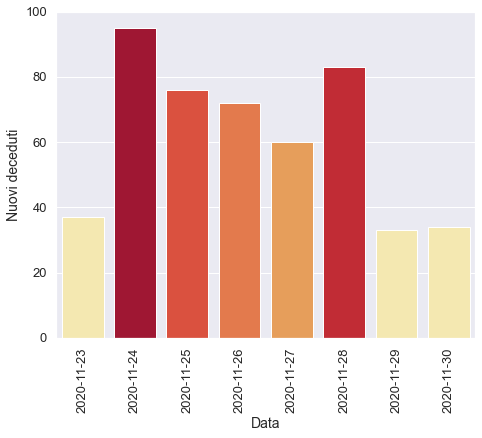

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

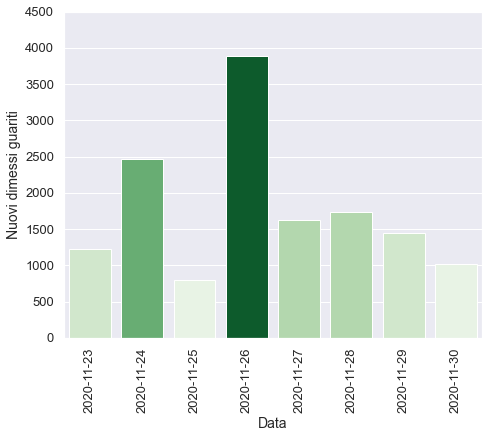

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)